<a href="https://colab.research.google.com/github/JuyoungYang/Practice/blob/main/%EA%B3%BC%EC%A0%9C1_%EC%A7%80%EB%8F%84%ED%95%99%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
from google.colab import files
import pandas as pd

In [22]:
uploaded = files.upload()

Saving housingdata.csv to housingdata.csv


In [24]:
file_name = list(uploaded.keys())[0]

In [31]:
data = pd.read_csv(file_name)

In [32]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [54]:
#중앙값이 평균값보다 이상치에 덜 민감하기 때문에 각 열의 결측치를 해당 열의 중앙값으로 채웁니다.
data.fillna(data.median(), inplace=True)

In [39]:
from scipy.stats import zscore
z_scores = np.abs(zscore(data))
filtered_entries = (z_scores < 3).all(axis=1)
data_cleaned = data[filtered_entries]

data_cleaned.head()
'''
이상치 탐지 및 제거: Z-점수 방법을 사용하여 데이터에서 이상치를 탐지하고 제거합니다.
Z-점수는 데이터 포인트가 평균에서 얼마나 떨어져 있는지를 나타내고
일반적으로 3보다 큰 Z-점수를 가진 데이터는 이상치로 간주하여 제거합니다.
'''


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,11.43,36.2


In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [41]:
X = data_cleaned.drop('MEDV', axis=1)
y = data_cleaned['MEDV']
#데이터를 특징(features)과 목표 변수(target variable)로 분리합니다.
#X는 입력 변수들(특징들), y는 예측하려는 값(목표 변수)입니다.

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
'''
데이터를 훈련 세트와 테스트 세트로 나눕니다.
훈련 세트는 모델을 학습시키는 데 사용되고, 테스트 세트는 학습된 모델을 평가하는 데 사용됩니다.
'''


linear_reg = LinearRegression()
decision_tree = DecisionTreeRegressor(random_state=42)
random_forest = RandomForestRegressor(random_state=42)
'''
선형 회귀(Linear Regression), 결정 트리(Decision Tree), 랜덤 포레스트(Random Forest) 머신러닝 모델 생성
'''


linear_reg.fit(X_train, y_train)
decision_tree.fit(X_train, y_train)
random_forest.fit(X_train, y_train)
'''
초기화한 모델들을 훈련 세트에 대해 학습시킵니다.
모델이 데이터를 학습하여 패턴을 파악하고 예측을 할 수 있게 됩니다.
'''


linear_reg_pred = linear_reg.predict(X_test)
decision_tree_pred = decision_tree.predict(X_test)
random_forest_pred = random_forest.predict(X_test)
'''
학습된 모델을 사용하여 테스트 세트에 대해 예측을 수행합니다.
모델의 예측 값을 실제 값과 비교하여 모델 성능을 평가합니다.
'''

linear_reg_pred[:5], decision_tree_pred[:5], random_forest_pred[:5]
#선형 회귀(Linear Regression), 결정 트리(Decision Tree), 랜덤 포레스트(Random Forest)
#예측 결과의 처음 5개 값

(array([23.91167913, 21.7939783 , 19.69731651, 14.27980076, 26.46560374]),
 array([20. , 20.6, 18.7, 13.6, 24.6]),
 array([22.9  , 20.974, 19.62 , 14.896, 24.084]))

In [47]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [48]:
#선형 회귀(Linear Regression) 모델에 대한 성능 지표
#평균 제곱 오차(MSE), 평균 절대 오차(MAE), 결정 계수(R²) 계산
mae_lr = mean_absolute_error(y_test, linear_reg_pred)
mse_lr = mean_squared_error(y_test, linear_reg_pred)
r2_lr = r2_score(y_test, linear_reg_pred)

#결정 트리(Decision Tree) 모델에 대한 성능 지표
#정확도(accuracy), 정밀도(precision), 재현율(recall), F1-score
mae_dt = mean_absolute_error(y_test, decision_tree_pred)
mse_dt = mean_squared_error(y_test, decision_tree_pred)
r2_dt = r2_score(y_test, decision_tree_pred)

#랜덤 포레스트(Random Forest) 모델에 대한 성능 지표
#정확도, F1-score
mae_rf = mean_absolute_error(y_test, random_forest_pred)
mse_rf = mean_squared_error(y_test, random_forest_pred)
r2_rf = r2_score(y_test, random_forest_pred)

(mae_lr, mse_lr, r2_lr), (mae_dt, mse_dt, r2_dt), (mae_rf, mse_rf, r2_rf)

((2.9518155082043633, 23.19312939325592, 0.6369576181720207),
 (2.7913580246913576, 18.404074074074074, 0.7119207686939718),
 (2.25983950617284, 15.655610185185173, 0.75494251274894))

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
#Seaborn 라이브러리의 스타일을 설정
#sns.set(style="whitegrid")

In [51]:
#시각화를 위한 데이터프레임 생성
metrics_df = pd.DataFrame({
    'Model': ['Linear Regression', 'Decision Tree', 'Random Forest'],
    'MAE': [mae_lr, mae_dt, mae_rf],
    'MSE': [mse_lr, mse_dt, mse_rf],
    'R2 Score': [r2_lr, r2_dt, r2_rf]
})

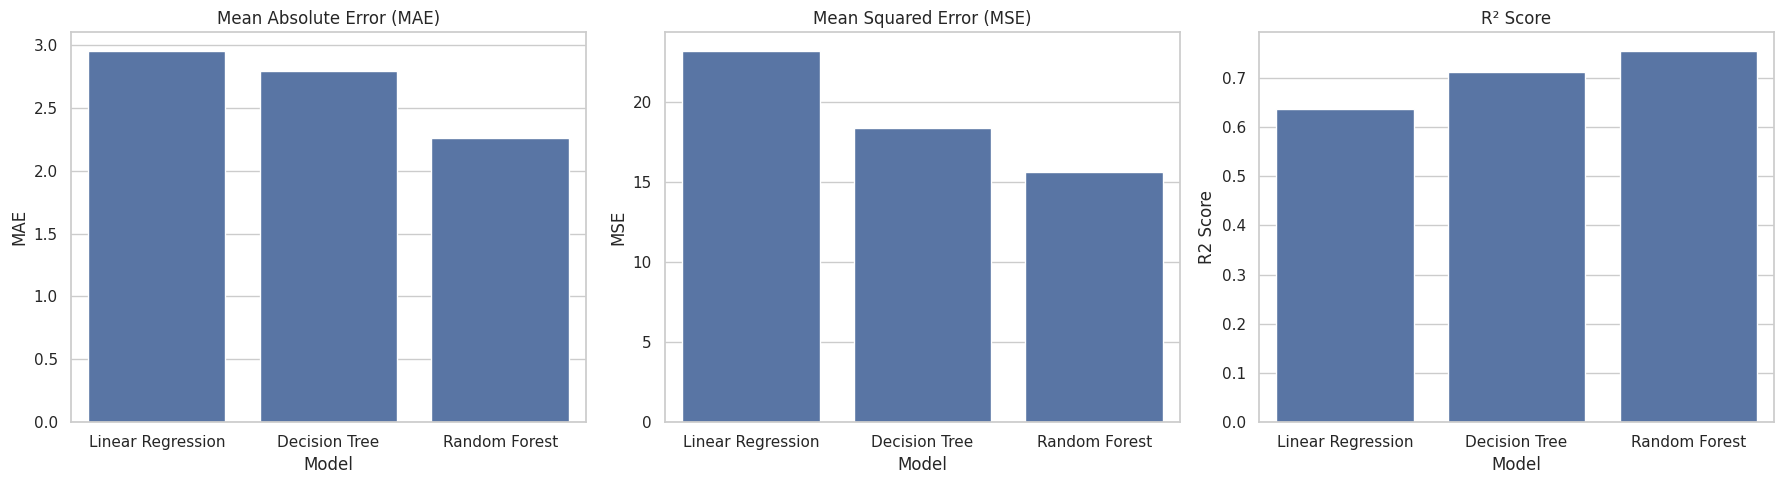

In [52]:
#성능 지표를 시각화
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.barplot(x='Model', y='MAE', data=metrics_df, ax=axes[0])
axes[0].set_title('Mean Absolute Error (MAE)')

sns.barplot(x='Model', y='MSE', data=metrics_df, ax=axes[1])
axes[1].set_title('Mean Squared Error (MSE)')

sns.barplot(x='Model', y='R2 Score', data=metrics_df, ax=axes[2])
axes[2].set_title('R² Score')

plt.tight_layout()
plt.show()

# 모델 성능 비교

### Mean Absolute Error (MAE)
- **랜덤 포레스트(Random Forest)**: 2.26 (가장 낮은 MAE로 예측값과 실제값 간의 평균 절대 오차가 가장 적음)
- **의사결정나무(Decision Tree)**: 2.79
- **선형 회귀(Linear Regression)**: 2.95

### Mean Squared Error (MSE)
- **랜덤 포레스트(Random Forest)**: 15.66 (가장 낮은 값으로 예측 오차의 제곱 평균이 가장 적음)
- **의사결정나무(Decision Tree)**: 18.40
- **선형 회귀(Linear Regression)**: 23.19

### R² Score
- **랜덤 포레스트(Random Forest)**: 0.75 (가장 높아 데이터 변동성을 가장 잘 설명함)
- **의사결정나무(Decision Tree)**: 0.71
- **선형 회귀(Linear Regression)**: 0.64

---

## 결론
- **랜덤 포레스트(Random Forest)** 모델이 **MAE**, **MSE**, **R² Score** 모든 지표에서 가장 우수한 성능을 보였습니다.  
- 따라서, 이 데이터셋에 대해 **랜덤 포레스트**가 최적의 회귀 모델로 선택될 수 있습니다.

---

## 시각화
### 첨부된 그래프
- **왼쪽**: MAE
- **중앙**: MSE
- **오른쪽**: R² Score  
- 랜덤 포레스트가 모든 지표에서 가장 좋은 성능을 보이는 것을 확인할 수 있습니다.